In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)

shuffle df and reset the index

In [3]:
df = df.sample(frac=1).reset_index(drop= 'True')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,132822.0,-0.493940,1.465460,-0.465066,0.819669,0.768330,-0.351048,1.011809,0.297802,-1.073582,...,0.193279,0.708128,-0.260469,-0.379891,0.069444,-0.370120,0.306399,0.168482,22.33,0
1,141156.0,2.058234,-0.019696,-2.084143,0.174879,0.518718,-1.157019,0.568523,-0.306363,0.191449,...,0.135532,0.407994,-0.046121,-0.406840,0.365376,-0.156746,-0.067614,-0.085515,14.90,0
2,53331.0,1.081729,0.180342,0.351861,1.671582,-0.502715,-0.481779,-0.202872,0.004882,0.812609,...,-0.102985,-0.066007,-0.172165,0.291131,0.662847,-0.280053,0.069221,0.067299,47.48,0
3,74456.0,-1.213263,0.468419,0.931367,-0.635360,0.386933,0.477978,-0.173933,0.765089,0.221292,...,0.155403,0.388815,-0.283131,-1.273325,0.107333,0.561967,0.207934,0.046406,29.45,0
4,76057.0,-0.597596,0.882157,1.442570,0.993201,0.301721,-0.770058,0.629310,-0.029845,-0.646120,...,0.206645,0.730289,0.004053,0.633685,-0.303226,-0.322822,0.424821,0.235072,17.31,0


How many records are fraud and non-fraud

In [14]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


Visualize frauds and non_frauds data

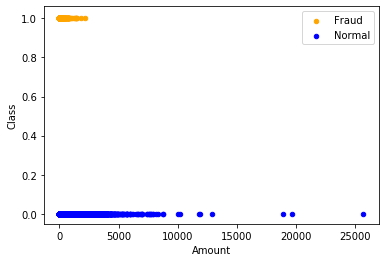

In [19]:
ax = frauds.plot.scatter(x='Amount',y='Class',color='Orange',label='Fraud')
non_frauds.plot.scatter(x='Amount',y='Class',color='Blue',label='Normal',ax=ax)
plt.show()

Frauds amount are below $5000 in the dataset

Prep train/test dataset

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [25]:
x=df.iloc[:,:-1]
y=df['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

Logistic Regression

In [28]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('Score',logistic.score(X_test,y_test))

C:\Users\Yan family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score 0.9987242957293166


Over-fitting? Maybe...